In [56]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import re

In [2]:
name_re = re.compile(r'noise_(\d{4})_lw_(\d{1,2})')
results_dir = Path('sim_results')
all_df = []
lw_array = []
noise_array = []
for fp in results_dir.glob('*.csv'):
    noise, lw = name_re.search(fp.stem).groups()
    all_df.append(pd.read_csv(fp, index_col=[0,1]))
    if lw == '8':
        lw = '08'
    lw_array.append(lw)
    noise_array.append(noise)


In [3]:
mi = pd.MultiIndex.from_arrays([lw_array, noise_array])
combined_df = pd.concat(all_df, keys=mi, names=['LW', 'Noise'])
combined_df.index.rename(('LW', 'Noise', 'MC rep', 'Fit Type'),inplace=True)
combined_df.sort_index(inplace=True)
combined_df.columns.rename('Metabolite',inplace=True)

# Make combined peaks
combined_df['Cr+PCr'] = combined_df['Cr'] + combined_df['PCr']
combined_df['NAA+NAAG'] = combined_df['NAA'] + combined_df['NAAG']
combined_df['Glx'] = combined_df['Glu'] + combined_df['Gln']
combined_df['Glx+GSH'] = combined_df['Glu'] + combined_df['Gln'] + combined_df['GSH']

In [4]:
conc_df = pd.read_csv('simulation_concs.csv', index_col=0, squeeze=True)
conc_df.index.rename('Metabolite',inplace=True)
conc_df

Metabolite
Ala          0.60
Asc          1.20
Asp          2.40
Cr           4.87
GABA         3.50
GPC          0.74
GSH          1.20
Glc          1.20
Gln          3.37
Glu         12.41
Ins          7.72
Lac          0.60
NAA         13.80
NAAG         1.20
PCh          0.85
PCr          4.87
PE           1.80
Scyllo       0.30
Tau          1.80
Cr+PCr       9.74
Glx         15.78
Glx+GSH     16.98
NAA+NAAG    15.00
Name: 0, dtype: float64

In [5]:
rmse = (combined_df - conc_df).pow(2).groupby(level=[0,1,3]).mean().pow(0.5)
rmse

Metabolite                 Ala       Asc       Asp        Cr    Cr+PCr  \
LW Noise Fit Type                                                        
08 0009  Diff              NaN       NaN       NaN       NaN       NaN   
         Dyn          0.029564  0.069342  0.072640  0.039704  0.014683   
         Off          0.038460  0.097458  0.103998  0.055759  0.019441   
         Off Matched  0.033702  0.083127  0.086727  0.048348  0.015362   
         On           0.044435  0.103969  0.100018  0.063443  0.026078   
...                        ...       ...       ...       ...       ...   
20 1152  Diff              NaN       NaN       NaN       NaN       NaN   
         Dyn          0.670426  1.841701  1.483323  1.175459  0.251228   
         Off          0.733815  1.614099  1.900962  1.618854  0.330299   
         Off Matched  0.647184  1.468541  1.649236  1.359971  0.248265   
         On           0.787654  1.798094  2.053258  1.935526  0.556350   

Metabolite                GABA       GPC       GSH       Glc       Gln  ...  \
LW Noise Fit Type                                                       ...   
08 0009  Diff         0.045930       NaN  0.127907       NaN  0.130904  ...   
         Dyn          0.030114  0.022420  0.026071  0.073048  0.069477  ...   
         Off          0.056501  0.030518  0.035506  0.101652  0.078694  ...   
         Off Matched  0.051327  0.026889  0.030047  0.081676  0.066073  ...   
         On           0.050897  0.034475  0.040190  0.102451  0.165752  ...   
...                        ...       ...       ...       ...       ...  ...   
20 1152  Diff         0.774329       NaN  1.995928       NaN  2.584026  ...   
         Dyn          0.511223  0.638795  0.700965  1.345962  1.411352  ...   
         Off          1.598944  0.578680  0.681094  1.606316  1.798783  ...   
         Off Matched  1.362796  0.528122  0.619517  1.346129  1.512743  ...   
         On           0.971751  0.614293  0.706467  1.598640  2.797603  ...   

Metabolite                 Ins       Lac       NAA  NAA+NAAG      NAAG  \
LW Noise Fit Type                                                        
08 0009  Diff              NaN       NaN  0.054734  0.037779  0.045946   
         Dyn          0.054631  0.027914  0.025141  0.022142  0.024741   
         Off          0.076076  0.042785  0.028713  0.023517  0.026517   
         Off Matched  0.063505  0.033727  0.025770  0.018712  0.023839   
         On           0.080119  0.040704  0.111308  0.123363  0.102532   
...                        ...       ...       ...       ...       ...   
20 1152  Diff              NaN       NaN  1.198374  0.587032  1.076583   
         Dyn          1.010505  0.698655  0.622662  0.345116  0.623697   
         Off          1.301114  0.743030  0.760010  0.384645  0.721494   
         Off Matched  1.107199  0.690728  0.651511  0.322413  0.610293   
         On           1.357739  0.730077  2.060255  2.020747  1.561415   

Metabolite                 PCh       PCr        PE    Scyllo       Tau  
LW Noise Fit Type                                                       
08 0009  Diff              NaN       NaN       NaN       NaN       NaN  
         Dyn          0.022957  0.038940  0.102885  0.006835  0.055837  
         Off          0.031471  0.054766  0.142031  0.009442  0.076303  
         Off Matched  0.027297  0.046319  0.124967  0.008400  0.066911  
         On           0.034893  0.059424  0.156692  0.009887  0.077544  
...                        ...       ...       ...       ...       ...  
20 1152  Diff              NaN       NaN       NaN       NaN       NaN  
         Dyn          0.632964  1.122137  3.143654  0.174631  1.541448  
         Off          0.577466  1.544571  3.121877  0.207097  2.009065  
         Off Matched  0.520901  1.315045  2.598982  0.184505  1.622257  
         On           0.612181  1.727095  3.502879  0.217549  1.927107  

[160 rows x 23 columns]

In [44]:
import seaborn as sns

filtered_rmse = rmse.filter(['Cr+PCr', 'NAA+NAAG', 'GABA', 'Glx']).drop(labels=['On', 'Off'], level=2)
filtered_rmse.rename(index={'Off Matched':'OFF', 'Diff':'DIFF', 'Dyn':'DYN'},inplace=True)
filtered_rmse = filtered_rmse.reindex(['OFF', "DIFF", "DYN"], level='Fit Type')

filtered_rmse_norm = 100 * filtered_rmse / conc_df.loc[['Cr+PCr', 'NAA+NAAG', 'GABA', 'Glx']]

filtered_rmse_relative = filtered_rmse/filtered_rmse.xs('OFF',level='Fit Type')
filtered_rmse_relative

to_plot = filtered_rmse.stack().reset_index().rename(columns={0:'RMSE'})
to_plot_norm = filtered_rmse_norm.stack().reset_index().rename(columns={0:'RMSE'})
to_plot_relative = filtered_rmse_relative.stack().reset_index().rename(columns={0:'RMSE'})


### Plotting
View a summary

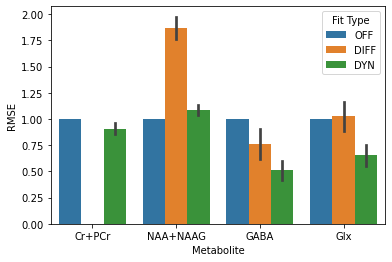

In [22]:
g = sns.barplot(data=to_plot_relative, x='Metabolite', y='RMSE', hue='Fit Type',ci='sd')

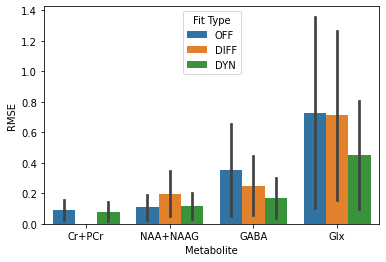

In [28]:
g = sns.barplot(data=to_plot, x='Metabolite', y='RMSE', hue='Fit Type',ci='sd')

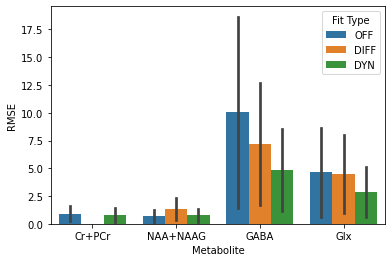

In [45]:
g = sns.barplot(data=to_plot_norm, x='Metabolite', y='RMSE', hue='Fit Type',ci='sd')

Dynamic fitting seems to have an advantage over 'DIFF'. Where does the variability come from?

#### Look across all data

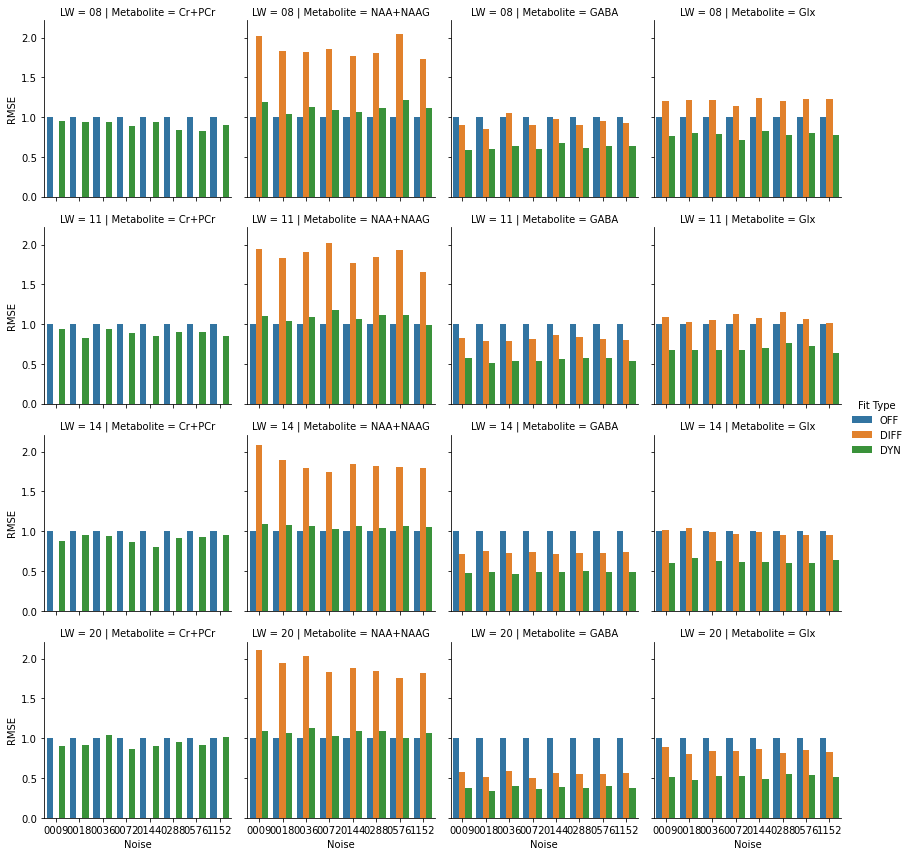

In [55]:
fig = sns.catplot(data=to_plot_relative, x='Noise', y='RMSE', hue='Fit Type',ci='sd', col='Metabolite', row='LW', kind='bar',height=3)

Variability due to LW, but not noise level

In [129]:
import numpy as np
linewidths = np.asarray([7.95, 11.1, 14.2, 20.5]) / np.pi
linewidths += 2.5  # Linewidth inherent in basis set
print(linewidths)
linewidths = [f'{lw:0.1f}' for lw in linewidths]
print(linewidths)

[5.0305636  6.03323974 7.02000038 9.02535267]
['5.0', '6.0', '7.0', '9.0']


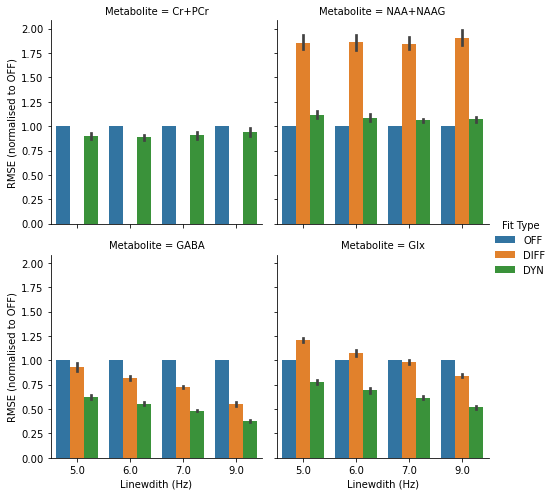

In [138]:
fig = sns.catplot(data=to_plot_relative, x='LW', y='RMSE', hue='Fit Type', col='Metabolite', kind='bar', height=3.5, col_wrap=2)
for ax in fig.axes:
   ax.set_xticklabels(linewidths)
   ax.set_xlabel('Linewdith (Hz)')
   ax.set_ylabel('RMSE (normalised to OFF)')

plt.savefig('../publication/figures/s6_editing_results_lw.png', dpi=400, bbox_inches='tight')

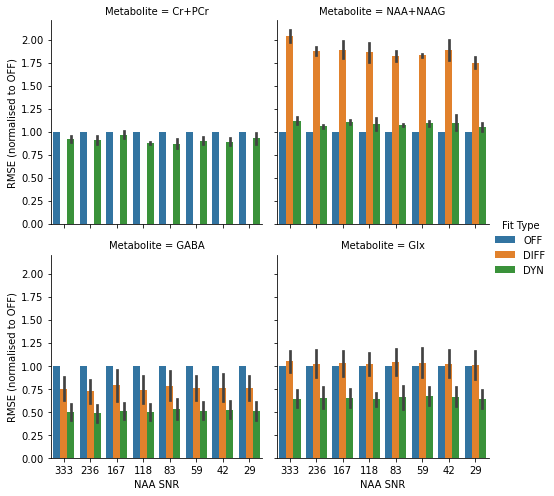

In [139]:
fig = sns.catplot(data=to_plot_relative, x='Noise', y='RMSE', hue='Fit Type',ci='sd', col='Metabolite', kind='bar', height=3.5, col_wrap=2)

naa_snr = 1 / (np.sqrt(np.asarray([9, 18, 36, 72, 144, 288, 576, 1152])) / 1000)

snr = [f'{s:0.0f}' for s in naa_snr]
for ax in fig.axes:
   ax.set_xticklabels(snr)
   ax.set_xlabel('NAA SNR')
   ax.set_ylabel('RMSE (normalised to OFF)')
plt.savefig('../publication/figures/s5_editing_results_noise.png', dpi=400, bbox_inches='tight')

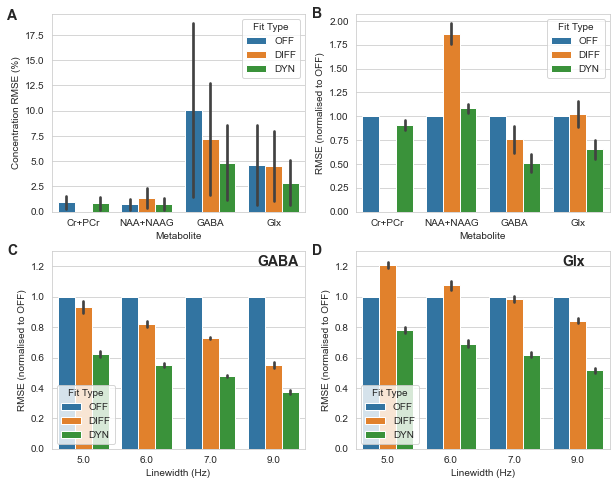

In [143]:
fig, axes = plt.subplots(2,2, figsize=(10, 8))
sns.set_style("whitegrid")

sns.barplot(data=to_plot_norm, x='Metabolite', y='RMSE', hue='Fit Type',ci='sd', ax=axes[0, 0])
sns.barplot(data=to_plot_relative, x='Metabolite', y='RMSE', hue='Fit Type',ci='sd', ax=axes[0, 1])

sns.barplot(
    data=to_plot_relative[to_plot_relative.Metabolite=='GABA'],
    x='LW',
    y='RMSE',
    hue='Fit Type',
    ax=axes[1, 0])

sns.barplot(
    data=to_plot_relative[to_plot_relative.Metabolite=='Glx'],
    x='LW',
    y='RMSE',
    hue='Fit Type',
    ax=axes[1, 1])

axes[0, 0].set_ylabel('Concentration RMSE (%)')
axes[0, 1].set_ylabel('RMSE (normalised to OFF)')
axes[1, 0].set_ylabel('RMSE (normalised to OFF)')
axes[1, 1].set_ylabel('RMSE (normalised to OFF)')

axes[1, 0].set_xlabel('Linewidth (Hz)')
axes[1, 1].set_xlabel('Linewidth (Hz)')
axes[1, 1].set_xticklabels(linewidths)
axes[1, 0].set_xticklabels(linewidths)

axes[1, 0].set_ylim([0, 1.3])
axes[1, 1].set_ylim([0, 1.3])

axes[1, 0].text(2.75, 1.2, 'GABA', fontsize=14, fontweight='bold')
axes[1, 1].text(2.75, 1.2, 'Glx', fontsize=14, fontweight='bold')

axes[0, 0].text(-1.2, 19, 'A', fontsize=14, fontweight='bold')
axes[0, 1].text(-1.2, 2.03, 'B', fontsize=14, fontweight='bold')
axes[1, 0].text(-1.2, 1.275, 'C', fontsize=14, fontweight='bold')
axes[1, 1].text(-1.2, 1.275, 'D', fontsize=14, fontweight='bold')

# plt.show()
plt.savefig('../publication/figures/fig4_editing_results.png', dpi=400, bbox_inches='tight')